## 爬虫-链家房价数据  

这个文件用于爬取链家网站上上海市的部分地段的房价数据，包括单价和总价。


In [51]:
#coding=utf-8
import urllib
from urllib import request
import re
import time
import numpy as np

### 爬虫部分  
这一部分首先定义了要爬取的地段的网址信息，这些信息需要自己去链家的网站上寻找规律并记录下来。随后通过正则表达式匹配分别找到每平米的单价和总价并记录在一个列表中。


In [103]:
metrostops={
    'minhang kaifaqu':'li143685060s100021907','wenjing road':'li143685060s100021908','huaning road':'li143685060s100021909','jinping road':'li143685060s100021910','dongchuan road':'li143685060s100021911','jianchuan road':'li143685060s100021912','beiqiao':'li143685060s100021913','zhuanqiao':'li143685060s100021914','yindu road':'li143685060s100021915','chunshen road':'li143685060s100021916', 'xinzhuang':'li143685060s100021837'
}

headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 BIDUBrowser/8.7 Safari/537.36'
 
}
url='https://sh.lianjia.com/ditiefang/li143685060s100021913/'

def get_data(url):
    request = urllib.request.Request(url, headers = headers)
    response = urllib.request.urlopen(request)
    text = response.read().decode('utf-8')
    #print(text)
    s1 = r'data-price="[0-9]+">'
    s2 = r'"totalPrice"><span>[0-9]+</span>'
    pattern1 = re.compile(s1, re.I)
    pattern2 = re.compile(s2, re.I)

    def find_number(s):
        s_re = r'[0-9]+'
        ans = re.search(s_re,s).group()
        return int(ans)
    price = list(map(find_number,pattern1.findall(text)))
    total_price = list(map(find_number,pattern2.findall(text)))
    return price,total_price

localtime = time.asctime( time.localtime(time.time()) )
file_name = localtime.split()[1]+localtime.split()[2]
file = open(r'C:\Users\Jiadong WANG\Desktop\tmp_Lianjia\{}.txt'.format(file_name),mode='w')

for metrostop in metrostops.keys():
    file.write(metrostop+'\n')
    price =list()
    total_price=list()
    for page in range(1,5):
        if page==0:
            url = r'https://sh.lianjia.com/ditiefang/{}/'.format(metrostops[metrostop])
        else:
            url = r'https://sh.lianjia.com/ditiefang/{}/pg{}'.format(metrostops[metrostop],page)
        price0,total_price0 = get_data(url)
        price.extend(price0)
        total_price.extend(total_price0)
    file.write(str(price)+'\n')
    file.write(str(total_price)+'\n')

file.close()

### 数据处理部分
这一部分主要做一些数据分析、处理和可视化工作。

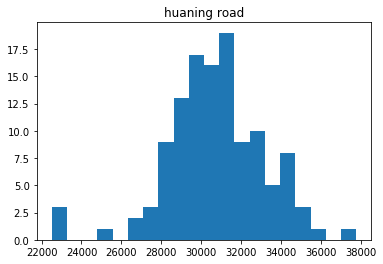

Around huaning road:
   average price is  30759.1666667
   minimum price is  22512
   maximum price is  37776


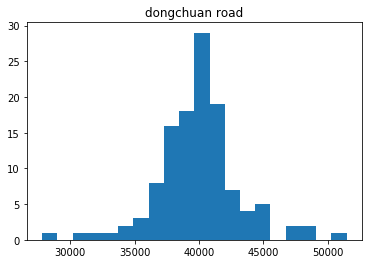

Around dongchuan road:
   average price is  39983.95
   minimum price is  27836
   maximum price is  51444


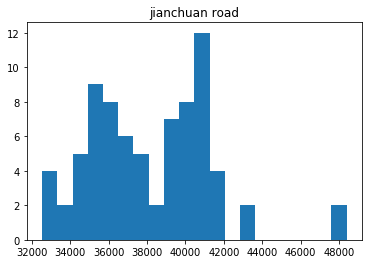

Around jianchuan road:
   average price is  38177.0
   minimum price is  32546
   maximum price is  48388


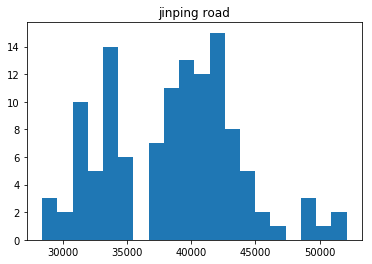

Around jinping road:
   average price is  38586.3583333
   minimum price is  28356
   maximum price is  52106


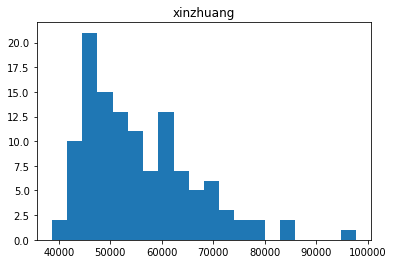

Around xinzhuang:
   average price is  55694.6833333
   minimum price is  38617
   maximum price is  97793


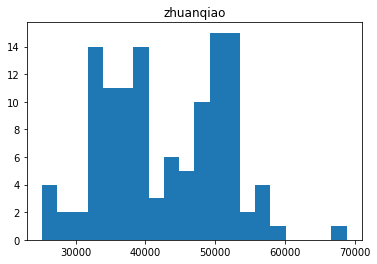

Around zhuanqiao:
   average price is  42716.3083333
   minimum price is  25207
   maximum price is  68833


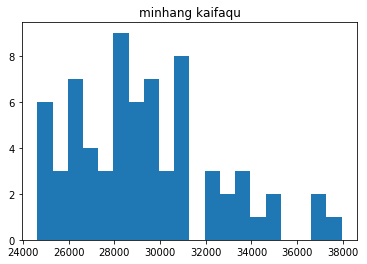

Around minhang kaifaqu:
   average price is  29336.1857143
   minimum price is  24630
   maximum price is  37944


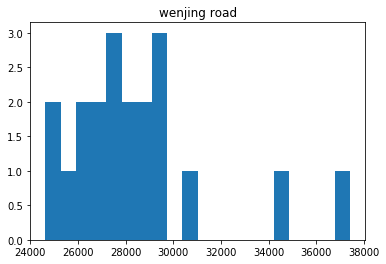

Around wenjing road:
   average price is  28455.25
   minimum price is  24630
   maximum price is  37411


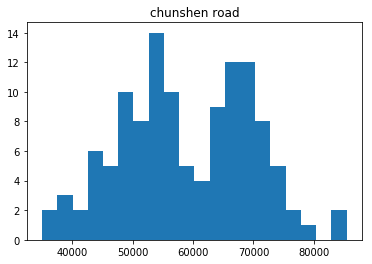

Around chunshen road:
   average price is  58868.0833333
   minimum price is  35030
   maximum price is  85410


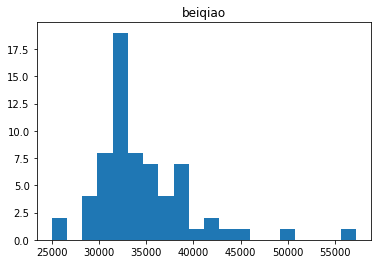

Around beiqiao:
   average price is  34542.1515152
   minimum price is  24967
   maximum price is  57269


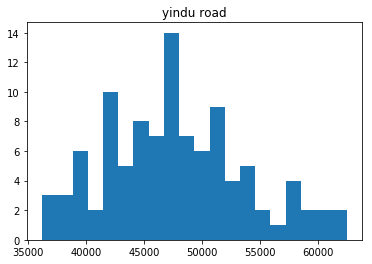

Around yindu road:
   average price is  47733.9117647
   minimum price is  36221
   maximum price is  62465


In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

data=dict()

with open(r'C:\Users\Jiadong WANG\Desktop\tmp_Lianjia\{}.txt'.format(file_name)) as file:
    lines=list(file)
    n = int(len(lines)/3)
    place = []
    price_all = []
    total_price_all = []
    for i in range(n):
        price = list(map(int,lines[3*i+1].rstrip(']\n').lstrip('[').split(',')))
        total_price = list(map(int,lines[3*i+2].rstrip(']\n').lstrip('[').split(',')))
        price_all.extend(price)
        total_price_all.extend(total_price)
        place.append(lines[3*i].strip('\n'))
        data[lines[3*i].strip('\n')]=[price,total_price]


ave_by_stop=[]
min_by_stop=[]
max_by_stop=[]
dev_by_stop=[]
for i in range(n):
    plt.figure(i)
    plt.hist(data[place[i]][0],bins=20,histtype='bar')
    plt.title(place[i])
    plt.show()
    tmp = np.array(data[place[i]][0])
    print('Around '+ place[i] +':')
    print('   average price is ', np.average(tmp))
    print('   minimum price is ', np.min(tmp))
    print('   maximum price is ', np.max(tmp))
    ave_by_stop.append(np.average(tmp))
    min_by_stop.append(np.min(tmp))
    max_by_stop.append(np.max(tmp))
    dev_by_stop.append(np.sqrt(np.var(tmp)))



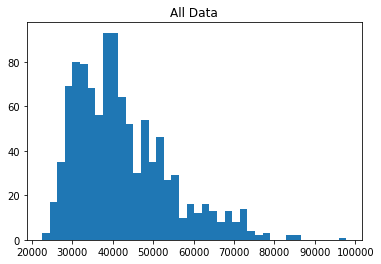

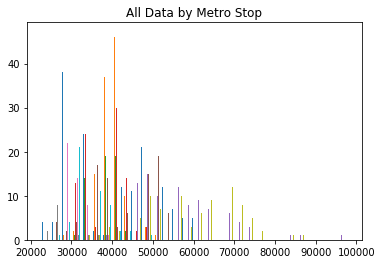

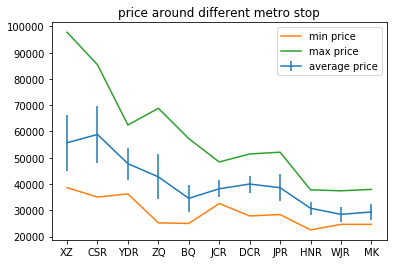

In [114]:
plt.figure(n+1)
plt.hist(price_all,bins=40,histtype='bar')
plt.title('All Data')
plt.show()

plt.figure(n+2)
plt.hist([data[place[i]][0] for i in range(n)],bins=30,histtype='bar')
plt.title('All Data by Metro Stop')
plt.show()

#Sort the data on distance to center of Shanghai
#闵行开发区文井路华宁路金平路东川路剑川路北桥颛桥银都路春申路莘庄
order = ['xinzhuang','chunshen road','yindu road','zhuanqiao','beiqiao','jianchuan road','dongchuan road','jinping road','huaning road','wenjing road','minhang kaifaqu']
order_brief=['XZ','CSR','YDR','ZQ','BQ','JCR','DCR','JPR','HNR','WJR','MK']

order_number = []
for i in range(len(order)):
    for j in range(len(place)):
        if place[j]==order[i]:
            order_number.append(j)
def put_in_new_order(my_list):
    tmp=[my_list[order_number[i]] for i in range(len(my_list))]
    return tmp

ordered_dev_by_stop = put_in_new_order(dev_by_stop)
ordered_min_by_stop = put_in_new_order(min_by_stop)
ordered_max_by_stop = put_in_new_order(max_by_stop)
ordered_ave_by_stop = put_in_new_order(ave_by_stop)

plt.figure(n+3)
plt.errorbar(order_brief,ordered_ave_by_stop,yerr=ordered_dev_by_stop,label='average price')
plt.plot(order_brief,ordered_min_by_stop,label='min price')
plt.plot(order_brief,ordered_max_by_stop,label='max price')
plt.title('price around different metro stop')
plt.legend()
plt.show()